In [1]:
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
import matplotlib.pyplot as plt
#from ImageDataset import ImageDataset
from image_dataset import ImageDataset
from torch import nn
import torch

# Set the path to the folder containing your unlabeled images
train_path = "data/DIV2K/train"
test_path = "data/DIV2K/valid"

# Define the transformation to be applied to each image
transform = transforms.Compose([
    #transforms.Resize((256, 256)),  # Resize the image to a fixed size
    transforms.RandomCrop((512,512)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()  # Convert the image to a tensor
])

# Create the ImageFolder dataset
train_data = ImageDataset(train_path, transform=transform)

test_data = ImageDataset(test_path, transform=transform)

In [2]:
from torch.utils.data import DataLoader
train_data_loader = DataLoader(dataset=train_data, 
                              batch_size=8, # how many samples per batch?
                              num_workers=1, # how many subprocesses to use for data loading? (higher = more)
                              shuffle=True) # shuffle the data?

test_data_loader = DataLoader(dataset=test_data, 
                              batch_size=8, # how many samples per batch?
                              num_workers=1, # how many subprocesses to use for data loading? (higher = more)
                              shuffle=True) # shuffle the data?

In [3]:
#img, label = train_data[0][0], train_data[0][1]
img = train_data[0]
#class_names = train_data.classes
print(f"Image tensor:\n{img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"img range = [{torch.min(img)}, {torch.max(img)}]")
#print(f"Image label: {label}")
#print(f"Label datatype: {type(label)}")

Image tensor:
tensor([[[0.1098, 0.1137, 0.1137,  ..., 0.0784, 0.0824, 0.0863],
         [0.1059, 0.1137, 0.1137,  ..., 0.0824, 0.0863, 0.0941],
         [0.1098, 0.1098, 0.1020,  ..., 0.0902, 0.0902, 0.0902],
         ...,
         [0.3725, 0.4157, 0.4039,  ..., 0.5725, 0.5451, 0.5373],
         [0.3647, 0.4039, 0.4000,  ..., 0.5569, 0.5608, 0.5765],
         [0.3961, 0.4078, 0.4157,  ..., 0.5647, 0.5451, 0.5686]],

        [[0.0706, 0.0745, 0.0745,  ..., 0.0431, 0.0392, 0.0431],
         [0.0706, 0.0784, 0.0745,  ..., 0.0471, 0.0471, 0.0510],
         [0.0745, 0.0745, 0.0667,  ..., 0.0549, 0.0471, 0.0471],
         ...,
         [0.2784, 0.3373, 0.3451,  ..., 0.4471, 0.4275, 0.4157],
         [0.2784, 0.3255, 0.3569,  ..., 0.4431, 0.4314, 0.4196],
         [0.3255, 0.3412, 0.3804,  ..., 0.4314, 0.3882, 0.3882]],

        [[0.0588, 0.0706, 0.0706,  ..., 0.0157, 0.0235, 0.0353],
         [0.0471, 0.0627, 0.0706,  ..., 0.0235, 0.0275, 0.0431],
         [0.0431, 0.0510, 0.0549,  ..., 0.03

Original shape: torch.Size([3, 512, 512]) -> [color_channels, height, width]
Image permute shape: torch.Size([512, 512, 3]) -> [height, width, color_channels]


(-0.5, 511.5, 511.5, -0.5)

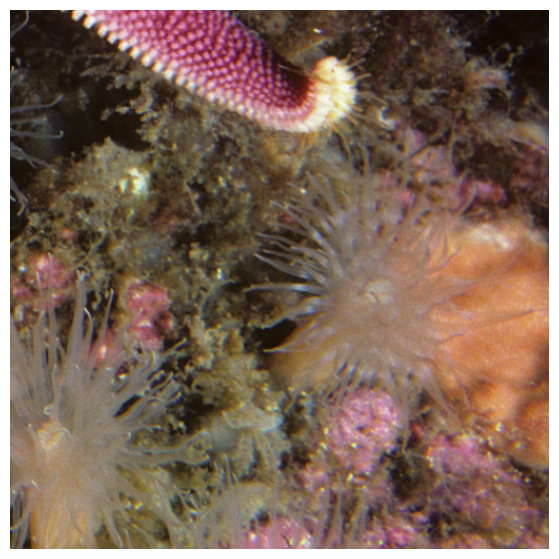

In [4]:
# Rearrange the order of dimensions
img_permute = img.permute(1, 2, 0)

# Print out different shapes (before and after permute)
print(f"Original shape: {img.shape} -> [color_channels, height, width]")
print(f"Image permute shape: {img_permute.shape} -> [height, width, color_channels]")

# Plot the image
plt.figure(figsize=(10, 7))
plt.imshow(img.permute(1, 2, 0))
plt.axis("off")
#plt.title(class_names[label], fontsize=14)

In [5]:
next(iter(train_data_loader)).shape

torch.Size([8, 3, 512, 512])

In [6]:
from pathlib import Path
# Create models directory (if it doesn't already exist), see: https://docs.python.org/3/library/pathlib.html#pathlib.Path.mkdir
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, # create parent directories if needed
                exist_ok=True # if models directory already exists, don't error
)

# Create model save path
MODEL_NAME = "autoencoder_upsampler_re2_vgg.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

In [7]:
from autoencoder_upscale_model import AutoencoderUpscaleModel
import torch
from my_upscale_model import UpscaleModel
from my_upscale_model2 import UpscaleModel2
from autoencoder_upsampler_2 import AutoencoderUpsampler2
from train_autoencoder import downsample_image

device = "cpu"

batch = next(iter(test_data_loader))

#model = UpscaleModel2()
model = AutoencoderUpsampler2()

model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

model.to(device)

img = downsample_image(batch, 4)
model.eval()
with torch.inference_mode():
    result = model(img.to(device))



Original shape: torch.Size([3, 256, 256]) -> [color_channels, height, width]
Image permute shape: torch.Size([256, 256, 3]) -> [height, width, color_channels]


(-0.5, 255.5, 255.5, -0.5)

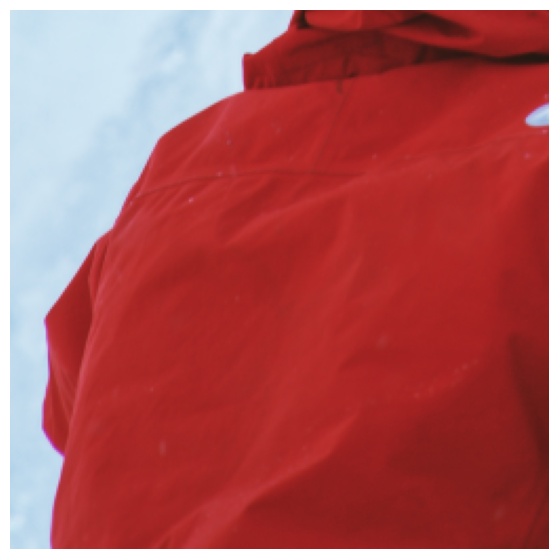

In [8]:
img = downsample_image(batch)[1]
img_permute = img.permute(1, 2, 0)

# Print out different shapes (before and after permute)
print(f"Original shape: {img.shape} -> [color_channels, height, width]")
print(f"Image permute shape: {img_permute.shape} -> [height, width, color_channels]")

# Plot the image
plt.figure(figsize=(10, 7))
plt.imshow(img.permute(1, 2, 0))
plt.axis("off")

In [9]:
img

tensor([[[0.8010, 0.7971, 0.7951,  ..., 0.6392, 0.6245, 0.5755],
         [0.8000, 0.7971, 0.7941,  ..., 0.6314, 0.6422, 0.6373],
         [0.8000, 0.7990, 0.7951,  ..., 0.6108, 0.6245, 0.6373],
         ...,
         [0.7431, 0.7343, 0.7314,  ..., 0.4480, 0.4500, 0.4480],
         [0.7471, 0.7451, 0.7373,  ..., 0.4490, 0.4461, 0.4451],
         [0.7500, 0.7500, 0.7412,  ..., 0.4402, 0.4451, 0.4422]],

        [[0.8912, 0.8873, 0.8853,  ..., 0.1490, 0.1471, 0.1314],
         [0.8902, 0.8873, 0.8843,  ..., 0.1441, 0.1490, 0.1529],
         [0.8902, 0.8892, 0.8853,  ..., 0.1333, 0.1373, 0.1490],
         ...,
         [0.8500, 0.8451, 0.8412,  ..., 0.1157, 0.1137, 0.1157],
         [0.8529, 0.8520, 0.8451,  ..., 0.1157, 0.1176, 0.1147],
         [0.8569, 0.8559, 0.8471,  ..., 0.1118, 0.1137, 0.1108]],

        [[0.9461, 0.9422, 0.9461,  ..., 0.1500, 0.1461, 0.1314],
         [0.9451, 0.9422, 0.9451,  ..., 0.1382, 0.1500, 0.1471],
         [0.9451, 0.9441, 0.9461,  ..., 0.1304, 0.1373, 0.

Original shape: torch.Size([3, 512, 512]) -> [color_channels, height, width]
Image permute shape: torch.Size([512, 512, 3]) -> [height, width, color_channels]


(-0.5, 511.5, 511.5, -0.5)

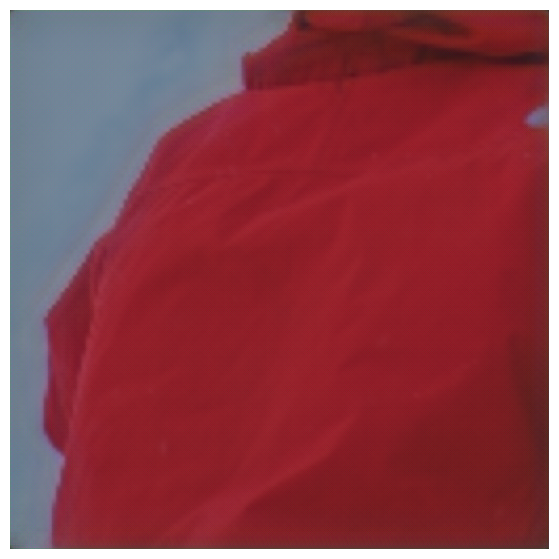

In [10]:
img = result[1].cpu()
img_permute = img.permute(1, 2, 0)

# Print out different shapes (before and after permute)
print(f"Original shape: {img.shape} -> [color_channels, height, width]")
print(f"Image permute shape: {img_permute.shape} -> [height, width, color_channels]")

# Plot the image
plt.figure(figsize=(10, 7))
plt.imshow(img.permute(1, 2, 0))
plt.axis("off")

In [11]:
result.shape

torch.Size([8, 3, 512, 512])

In [12]:
img.shape

torch.Size([3, 512, 512])

In [13]:
result[1]

tensor([[[0.2680, 0.3366, 0.3452,  ..., 0.3186, 0.2823, 0.2509],
         [0.3063, 0.3460, 0.3557,  ..., 0.3366, 0.3553, 0.2879],
         [0.3422, 0.3873, 0.4170,  ..., 0.3663, 0.3938, 0.3309],
         ...,
         [0.3145, 0.3728, 0.3714,  ..., 0.3190, 0.3129, 0.3073],
         [0.2895, 0.3322, 0.3398,  ..., 0.3060, 0.3394, 0.2909],
         [0.2672, 0.2572, 0.3028,  ..., 0.2369, 0.2304, 0.2233]],

        [[0.3052, 0.3457, 0.3728,  ..., 0.2391, 0.2272, 0.1900],
         [0.3733, 0.3865, 0.4040,  ..., 0.2479, 0.2358, 0.2008],
         [0.3903, 0.4390, 0.4229,  ..., 0.2511, 0.2233, 0.2401],
         ...,
         [0.3622, 0.3827, 0.4325,  ..., 0.2035, 0.2342, 0.2226],
         [0.3274, 0.3938, 0.3896,  ..., 0.2483, 0.1966, 0.2465],
         [0.2944, 0.3770, 0.3629,  ..., 0.2235, 0.2285, 0.2163]],

        [[0.2899, 0.3591, 0.3747,  ..., 0.1914, 0.1932, 0.1779],
         [0.3143, 0.4182, 0.4394,  ..., 0.1865, 0.2079, 0.1892],
         [0.3622, 0.4551, 0.4516,  ..., 0.2452, 0.2117, 0.

In [14]:
img1 = downsample_image(batch, factor=4)
img1.shape

torch.Size([8, 3, 128, 128])

In [15]:
for param in model.parameters():
    print(param)

Parameter containing:
tensor([[[[ 1.1040e-02,  6.1663e-02, -2.1575e-03,  ..., -1.4181e-02,
            4.6291e-02, -3.6579e-02],
          [ 2.5315e-02,  2.4999e-02, -1.4879e-02,  ...,  2.2003e-02,
           -1.1726e-02, -3.6409e-02],
          [ 2.8945e-02,  4.5215e-02,  9.4889e-03,  ..., -5.0612e-02,
           -2.5901e-02, -1.3882e-02],
          ...,
          [-4.8441e-02, -1.9241e-02, -5.9583e-02,  ...,  1.5702e-02,
            5.9557e-02, -3.7201e-02],
          [ 9.6868e-03,  5.4053e-02,  6.4098e-02,  ...,  5.5399e-02,
           -5.8210e-02,  5.4667e-02],
          [ 6.1495e-02, -6.2011e-02,  1.8075e-02,  ...,  1.5149e-02,
            1.9012e-02,  1.7133e-02]],

         [[-3.9788e-02, -5.4085e-02, -3.4282e-02,  ..., -9.7213e-03,
           -3.1012e-02, -1.0421e-02],
          [-2.0658e-02,  4.3690e-02, -9.5437e-03,  ...,  2.5859e-04,
           -8.2143e-03,  2.3872e-02],
          [-5.3013e-03, -5.9642e-02,  5.7757e-03,  ...,  2.4978e-02,
           -5.9954e-02, -4.2037e-02]

In [16]:
loss_fn = torch.nn.MSELoss(reduction='sum')

In [17]:
batch.shape, result.shape

(torch.Size([8, 3, 512, 512]), torch.Size([8, 3, 512, 512]))

In [18]:
loss = loss_fn(result, batch.to(device))
loss

tensor(203761.8125)

In [19]:
type(model)

autoencoder_upsampler_2.AutoencoderUpsampler2

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 511.5, 511.5, -0.5)

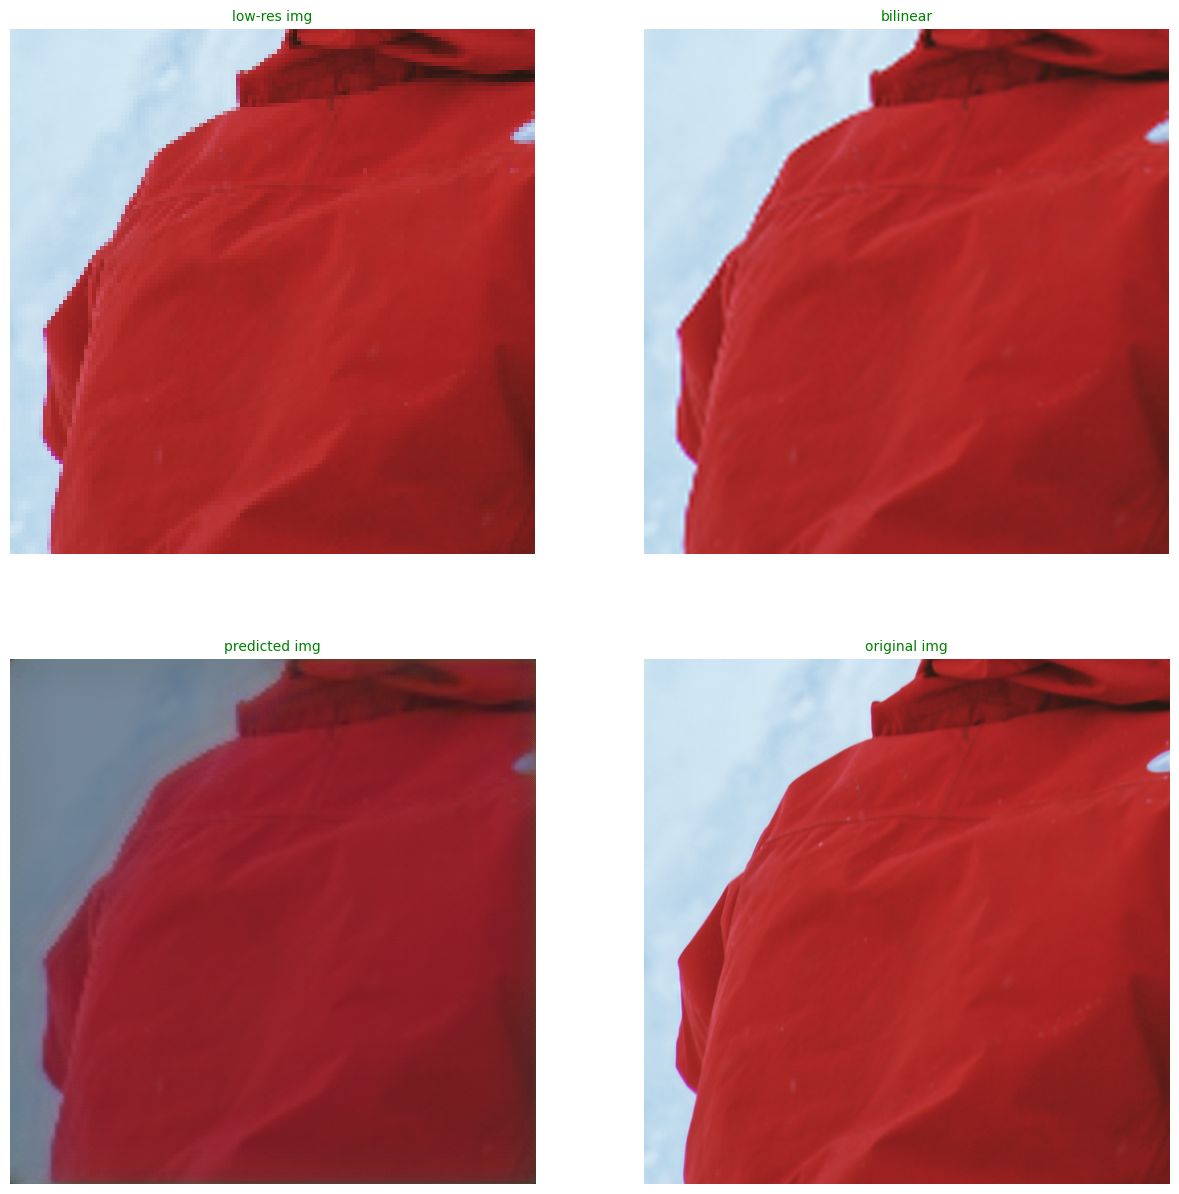

In [20]:
i = 1
y = batch[i]
y_pred = result[i]

upsample = nn.Upsample(scale_factor=4, mode="bicubic")

# Plot predictions
plt.figure(figsize=(15, 15))
nrows = 2
ncols = 2

plt.subplot(nrows, ncols, 1)
plt.imshow(downsample_image(y.unsqueeze(dim=0), factor=4).squeeze().permute(1, 2, 0))
plt.title("low-res img", fontsize=10, c="g") # green text if correct
plt.axis(False)

plt.subplot(nrows, ncols, 2)
plt.imshow(upsample(downsample_image(y.unsqueeze(dim=0), factor=4)).squeeze().permute(1, 2, 0))
plt.title("bilinear", fontsize=10, c="g") # green text if correct
plt.axis(False)

plt.subplot(nrows, ncols, 3)
plt.imshow(y_pred.permute(1, 2, 0))
plt.title("predicted img", fontsize=10, c="g") # green text if correct
plt.axis(False)

plt.subplot(nrows, ncols, 4)
plt.imshow(y.permute(1, 2, 0))
plt.title("original img", fontsize=10, c="g") # green text if correct
plt.axis(False)

In [21]:
from vgg_loss import VGGLoss
vgg_loss_fn = VGGLoss(device="cpu")


d:\oleyon\github_repo\deep_learning_diploma\.venv\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
d:\oleyon\github_repo\deep_learning_diploma\.venv\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [22]:
some_loss = vgg_loss_fn.forward_demo(batch[i])
some_loss.shape

torch.Size([512, 64, 64])

In [23]:
i=0
for param in vgg_loss_fn.vgg.parameters():
    print(param.shape)
    i+=1
i

torch.Size([64, 3, 3, 3])
torch.Size([64])
torch.Size([64, 64, 3, 3])
torch.Size([64])
torch.Size([128, 64, 3, 3])
torch.Size([128])
torch.Size([128, 128, 3, 3])
torch.Size([128])
torch.Size([256, 128, 3, 3])
torch.Size([256])
torch.Size([256, 256, 3, 3])
torch.Size([256])
torch.Size([256, 256, 3, 3])
torch.Size([256])
torch.Size([256, 256, 3, 3])
torch.Size([256])
torch.Size([512, 256, 3, 3])
torch.Size([512])
torch.Size([512, 512, 3, 3])
torch.Size([512])


20

Original shape: torch.Size([64, 64]) -> [height, width]


(-0.5, 63.5, 63.5, -0.5)

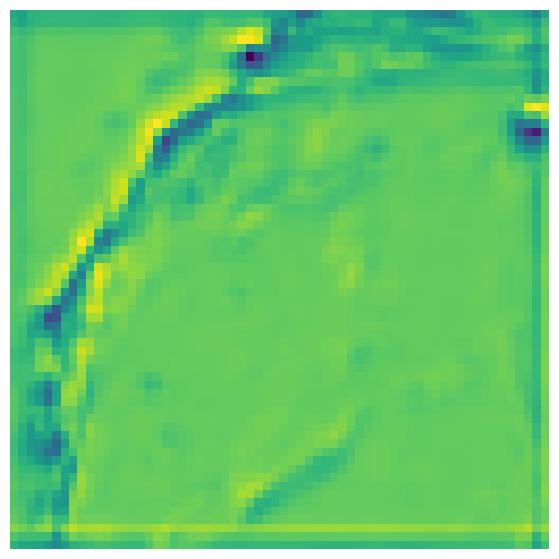

In [24]:
img = some_loss[11].cpu()

# Print out different shapes (before and after permute)
print(f"Original shape: {img.shape} -> [height, width]")

# Plot the image
plt.figure(figsize=(10, 7))
plt.imshow(img)
plt.axis("off")

In [25]:
# from collections import OrderedDict

# import torch
# from torch import nn, optim

# from ignite.engine import *
# from ignite.handlers import *
# from ignite.metrics import *
# from ignite.utils import *
# from ignite.contrib.metrics.regression import *
# from ignite.contrib.metrics import *

# # create default evaluator for doctests

# def eval_step(engine, batch):
#     return batch

# default_evaluator = Engine(eval_step)

# # create default optimizer for doctests

# param_tensor = torch.zeros([1], requires_grad=True)
# default_optimizer = torch.optim.SGD([param_tensor], lr=0.1)

# # create default trainer for doctests
# # as handlers could be attached to the trainer,
# # each test must define his own trainer using `.. testsetup:`

# def get_default_trainer():

#     def train_step(engine, batch):
#         return batch

#     return Engine(train_step)

# # create default model for doctests

# default_model = nn.Sequential(OrderedDict([
#     ('base', nn.Linear(4, 2)),
#     ('fc', nn.Linear(2, 1))
# ]))

# #manual_seed(666)

# test_y_pred = torch.randn((3,512,512))

# from ignite.metrics import *
# metric = SSIM(data_range=1.0)
# metric.attach(default_evaluator, 'ssim')
# state = default_evaluator.run([[y_pred.unsqueeze(dim=0), y.unsqueeze(dim=0)]])
# print(state.metrics['ssim'])
# print(f"ssim loss = {torch.tensor((1 - state.metrics['ssim'])/2)}")

In [26]:
# from custom_loss import SSIMLoss, VGGPerceptualLoss, SSIM, CombinedLoss

# ssim_loss_fn = SSIM(window_size=11,sigma=1.5)
# vgg_loss_fn = VGGPerceptualLoss()
# vgg_ssim_fn = CombinedLoss(loss_shift=1.0)
# ssim_loss_res = ssim_loss_fn(y_pred.unsqueeze(dim=0), y.unsqueeze(dim=0))
# vgg_loss_fn.to('cuda')
# vgg_loss_res = vgg_loss_fn(y_pred.unsqueeze(dim=0).to('cuda'), y.unsqueeze(dim=0).to('cuda'))
# true_loss_res = vgg_ssim_fn(y_pred.unsqueeze(dim=0), y.unsqueeze(dim=0))
# loss_res = vgg_loss_res + 1 * ssim_loss_res
# #vgg_loss_fn.to('cuda')
# for param in vgg_loss_fn.parameters():
#     print(param.device)
# ssim_loss_res, vgg_loss_res, loss_res, true_loss_res

In [27]:
import math

window_size = 11
sigma = 1.5
gauss = torch.Tensor([math.exp(-(x - window_size // 2) ** 2 / float(2 * sigma ** 2)) for x in range(window_size)])
window = gauss.unsqueeze(0) * gauss.unsqueeze(1)

In [28]:
gauss

tensor([0.0039, 0.0286, 0.1353, 0.4111, 0.8007, 1.0000, 0.8007, 0.4111, 0.1353,
        0.0286, 0.0039])

(-0.5, 10.5, 10.5, -0.5)

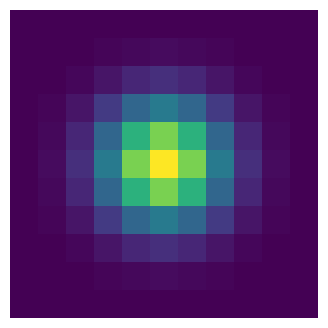

In [29]:
plt.figure(figsize=(4, 4))
plt.imshow(window)
plt.axis("off")

In [30]:
from train_statistics import TrainingStatisticsLogger
import os
print(os.getcwd())
logger = TrainingStatisticsLogger()
logger.load_from_json(filename='log/autoencoder_upsampler_re_test_log.json')
logger.ssim

d:\oleyon\github_repo\deep_learning_diploma\diploma


[0.03529925458133221,
 0.0483977273106575,
 0.09543241773332868,
 0.17812544852495193,
 0.2196930753333228,
 0.19303095127855027,
 0.2136421799659729,
 0.22207076208932058,
 0.24304171332291194,
 0.27035702764987946,
 0.2728869787284306,
 0.30175767626081196,
 0.28294684844357626,
 0.29743640763419016,
 0.3319910594395229,
 0.32242954628808157,
 0.315739312342235,
 0.3410152622631618,
 0.3459026387759617,
 0.3418125680514744,
 0.33436587878635954,
 0.3350448097501482,
 0.323603412934712,
 0.3542272278240749,
 0.38509614978517803,
 0.374527599130358,
 0.3494489533560617,
 0.3972801182951246,
 0.3891837937491281,
 0.4141432430062975,
 0.45058158891541616,
 0.5219908612115043,
 0.5872023275920323,
 0.608162488256182,
 0.6012741753033229,
 0.6439149124281747,
 0.6372361608913967,
 0.6510754653385707,
 0.6663808652332851,
 0.654070258140564]

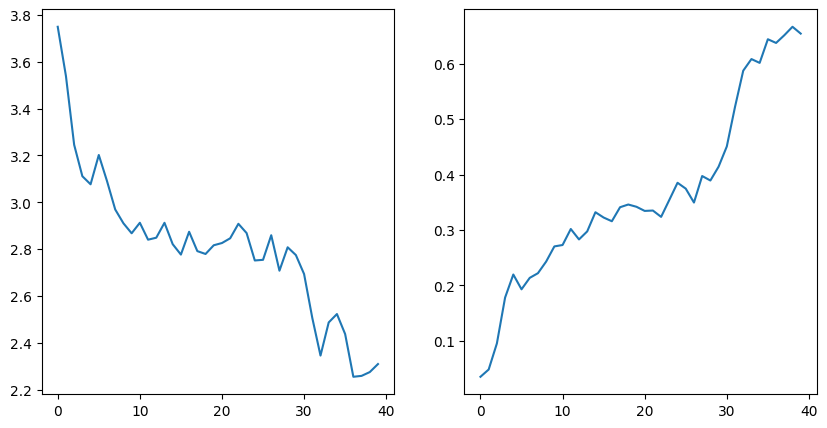

In [31]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.plot(logger.epoch_loss)
plt.subplot(1,2,2)
plt.plot(logger.ssim)